In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Creating $\varepsilon$ from g-and-h distribution with sample size 50.
Four types of distributions are considered for the error term: normal, symmetric and
heavy-tailed (roughly meaning that outliers tend to be common), asymmetric and relatively
light-tailed, and asymmetric and relatively heavy-tailed. More specifically, data are generated fromg-and-h distributions,which arise as follows. Let $Z$ be a random variable
having a standard normal distribution. Then
$$\begin{equation}
W=
\begin{cases}
\dfrac{\exp{(gZ)}-1}{g}\exp{(hZ^2/2)} & \text{if} ~~g>0\nonumber\\
Z\exp{(hZ^2/2)} & \text{if} ~~g=0
\end{cases}
\end{equation}$$
has a g-and-h distribution, where g and h are parameters that determine the first four
moments.
#### Step 1: create 50 random numbers that follow standard normal distribution

In [34]:
normal=np.random.normal(0.00,1.00, size=(50,1))

#### Step 2: define a function which can generate g-and-h distribution

In [35]:
def gnh(z,g,h):
    """Create g-and-h distribution"""
    w=np.zeros((len(z),1))
    for i in np.arange(len(z)):
        if g==0:
            w[i,0]=z[i,0]*np.exp(h*z[i,0]**2/2)
        elif g>0:
            w[i,0]=(np.exp(g*z[i,0])-1)/g*np.exp(h*z[i,0]**2/2)
    return w

In [36]:
sym=gnh(normal, g=0, h=0.2)

In [37]:
asym_lt=gnh(normal,g=0.2,h=0)

In [38]:
asym_ht=gnh(normal,g=0.2,h=0.2)

In [39]:
stats.skew(asym_ht)

array([1.30326173])

In [40]:
stats.skew(asym_lt)

array([0.58645184])

In [41]:
stats.kurtosis(asym_ht)

array([1.75599804])

In [42]:
stats.kurtosis(asym_lt)

array([-0.19090712])

In [43]:
stats.skew(normal)

array([0.16461946])

In [44]:
stats.kurtosis(normal)

array([-0.70214219])

In [45]:
stats.skew(sym)

array([0.7814281])

In [46]:
stats.kurtosis(sym)

array([0.64810961])

In [47]:
np.mean(normal)

0.18789110663626335

In [48]:
np.mean(sym)

0.295842394593377

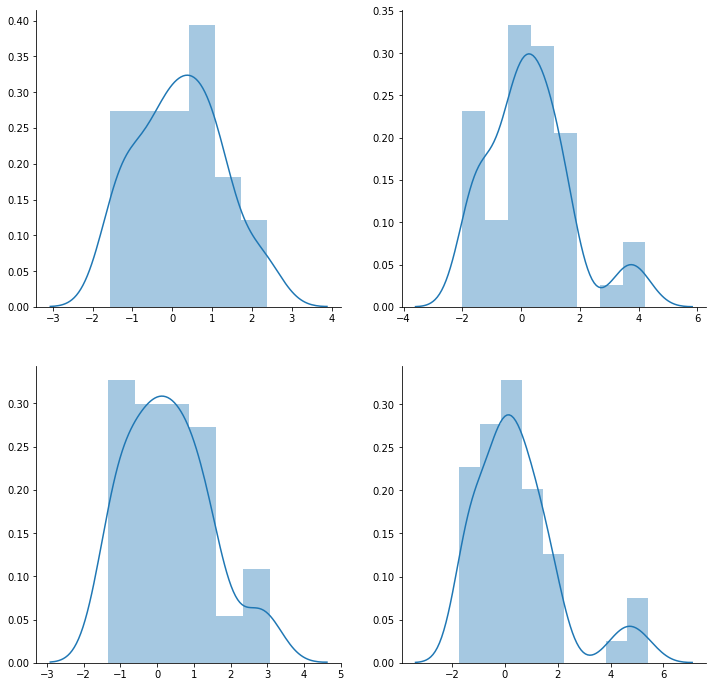

In [61]:
fig, axs=plt.subplots(2,2)
fig.set_figwidth(12)
fig.set_figheight(12)


sns.distplot(normal,ax=axs[0,0])
sns.distplot(sym,ax=axs[0,1])
sns.distplot(asym_lt,ax=axs[1,0])
sns.distplot(asym_ht,ax=axs[1,1])

sns.despine()

## Creating ($X_1,X_2$) from multivariate normal distribution with correlation $\rho=0$.

In [67]:
x1, x2=np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]],size=50).T

# Creating multivariate normal distribution with correlation $\rho=0.6$